In [1]:
!pip install textblob
!pip install wordcloud
!python -m textblob.download_corpora
!pip install plotly
!pip install wordninja
!pip install pyspellchecker

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached click-8.0.1-py3-none-any.whl (97 kB)
  Using cached tqdm-4.61.0-py2.py3-none-any.whl (75 kB)
  Using cached regex-2021.4.4-cp39-cp39-manylinux2014_x86_64.whl (730 kB)
  Using cached wordcloud-1.8.1-cp39-cp39-manylinux1_x86_64.whl (363 kB)
  Using cached Pillow-8.2.0-cp39-cp39-manylinux1_x86_64.whl (3.0 MB)
  Using cached matplotlib-3.4.2-cp39-cp39-manylinux1_x86_64.whl (10.3 MB)
  Using cached numpy-1.20.3-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.4 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-manylinux1_x86_64.whl (1.2 MB)
[nltk_data] Downloading package brown to /home/daro/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/daro/nltk_data...
[nltk_data]   Package punkt 

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [3]:
df = pd.read_csv("data/vaccination_all_tweets.csv", quotechar='"', delimiter=',').dropna()
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78313,1392827719029649410,Inter Press Service,Also @ipsnoticias,IPS: News and Views from the Global South | Lo...,2008-11-26 14:46:55,19038,1582,6407,False,2021-05-13 13:03:00,#SputnikV Diplomacy: Russia makes sure to port...,['SputnikV'],TweetDeck,0,1,False
78314,1392826970979799041,yash,New Delhi,I exist here because democracy dies in darkness.,2017-09-22 04:42:00,146,850,321,False,2021-05-13 13:00:02,#SputnikV will be available in India from next...,"['SputnikV', 'BreakingNews']",Twitter for Android,0,0,False
78315,1392826919016488961,Global Tribune,New Delhi,India's Fearless National Mind,2020-02-22 06:35:12,60,8,15,False,2021-05-13 12:59:49,Sputnik V Could Be Available In Market From Ne...,"['SputnikV', 'vaccine', 'vaccination', 'NitiAa...",Twitter for Android,0,0,False
78317,1392826283608875012,Russian Embassy in Sri Lanka,Colombo,Embassy of the Russian Federation🇷🇺 in Sri Lan...,2011-08-01 00:55:43,4991,500,1617,True,2021-05-13 12:57:18,❗️The Food and Drug Authority of the Republic ...,"['Maldives', 'Russian', 'SputnikV', 'COVID19']",Twitter Web App,2,6,False


In [4]:
print(df.columns)
print(df.shape)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(46048, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46048 entries, 0 to 78318
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                46048 non-null  int64 
 1   user_name         46048 non-null  object
 2   user_location     46048 non-null  object
 3   user_description  46048 non-null  object
 4   user_created      46048 non-null  object
 5   user_followers    46048 non-null  int64 
 6   user_friends      46048 non-null  int64 
 7   user_favourites   46048 non-null  int64 
 8   user_verified     46048 non-null  bool  
 9   date              46048 non-null  object
 10  text              46048 non-null  object
 11  hashtags          46048 non-null  object
 12  source            46048 non-null  object
 13  retweets          46048 non-null  int64 
 14  favorites         46048 non-null  int64 
 15  is_retweet        46048 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 5.4+ MB


## Data Wrangling & Pre Processing

In [7]:
df.drop(columns=['id'], inplace=True)

KeyError: "['id'] not found in axis"

In [8]:
df = df.drop_duplicates('text')
print(df.shape)

(45998, 15)


In [9]:
# use regular expressions to strip each tweet of mentions, hashtags, retweet information, and links
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
df['text'].transform(clean_tweet_text)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [10]:
# we do not care about the exact time of each tweet, we just want the date
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


## Exploratory Data Analysis (EDA)

In [11]:
df.describe()

,user_followers,user_friends,user_favourites,retweets,favorites
count,4.599800e+04,45998.000000,4.599800e+04,45998.000000,45998.000000
mean,1.496714e+05,1520.010674,1.713609e+04,4.197639,18.795165
std,1.066294e+06,6909.069401,4.649750e+04,79.055460,268.304877
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.940000e+02,181.000000,5.230000e+02,0.000000,0.000000
50%,8.560000e+02,489.000000,2.779500e+03,0.000000,1.000000
75%,3.789000e+03,1382.000000,1.348250e+04,1.000000,4.000000
max,1.541562e+07,516578.000000,1.214813e+06,11288.000000,25724.000000


<AxesSubplot:>

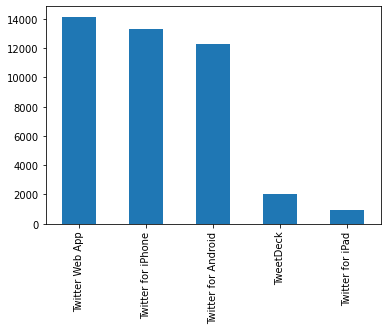

In [12]:
# which device are people tweeting about the vaccine from?
df['source'].value_counts().head(n=5).plot.bar()

<AxesSubplot:>

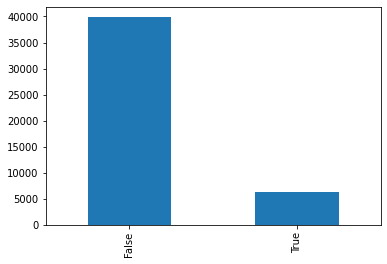

In [13]:
df['user_verified'].value_counts().head(n=10).plot.bar()

In [14]:
df[df['user_verified'] == True].head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
15,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter for iPhone,0,1,False
17,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,2020-12-12,"Coronavirus: Iran reports 8,201 new cases, 221...","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False
22,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than...,['vaccine'],Buffer,1,0,False
43,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter Web App,0,2,False
44,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,2020-12-12,#FDA authorizes #PfizerBioNTech #coronavirus v...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False


In [15]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
68358,"RDIF, Laboratorios Richmond launched production of #SputnikV in Argentina, the first country in Latin America to ma… https://t.co/oEMaUwVR92",2021-04-20,Sputnik V,"Moscow, Russia",['SputnikV'],25724,11288
46053,Why we need Two Doses of mRNA Vaccine 💉 #vaccines #COVID19 #Pfizer #moderna #VaccinesSaveLives #vaccinated https://t.co/RFRmPAyubD,2021-04-01,hotvickkrishna,"Manhattan, NY","['vaccines', 'COVID19', 'Pfizer', 'moderna', 'VaccinesSaveLives', 'vaccinated']",19622,7695
66822,ICMR study shows #COVAXIN neutralises against multiple variants of SARS-CoV-2 and effectively neutralises the doubl… https://t.co/0IYwr0KymJ,2021-04-21,ICMR,New Delhi,['COVAXIN'],11995,4851
76306,#Argentina's actor breaks into a live TV to show his #SputnikV vaccination certificate &amp; express his gratitude. \n\nT… https://t.co/N1NwjkD83y,2021-05-19,Sputnik V,"Moscow, Russia","['Argentina', 'SputnikV']",14412,2550
17118,"Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf",2021-03-01,Dr. S. Jaishankar,"New Delhi, India",['Covaxin'],22815,2360
53045,I see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna… https://t.co/eoqT74V78A,2021-04-12,dawnymock,Fredericton New Brunswick,"['covid', 'vaccine', 'pfizer', 'moderna']",10175,2299
7126,"New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO",2021-02-10,Robert F. Kennedy Jr,"Los Angles, California",['mRNA'],3090,2247
24268,"#Covaxin 🇮🇳 , made by Hyderabad-based Bharat Biotech International Limited, has been declared ""Safe, Immunogenic wi… https://t.co/FAUOEHJmAw",2021-03-09,Megh Updates 🚨,Turn on Notification 🔔,['Covaxin'],9458,2095
32826,A batch of fake Sputnik V vaccines was confiscated in Mexico. See this comparison of the genuine #SputnikV with a f… https://t.co/J7PxMq2e1M,2021-03-18,Sputnik V,"Moscow, Russia",['SputnikV'],3473,1980
17543,Prime Minister Narendra Modi choose early morning time to take #covaxin . No traffic was stopped . Traveled normall… https://t.co/udxAqk9xEC,2021-03-01,Megh Updates 🚨,Turn on Notification 🔔,['covaxin'],8153,1980


In [16]:
df.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
35,An immigrant Muslim couple find the COVID-19 Vaccine. \n\n#CovidVaccine #PfizerBioNTech #Pfizervaccine #PfizerProud,2020-12-12,Shahjhan Malik | #WearAMask,"Nottinghamshire, England","['CovidVaccine', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerProud']",37,2
293,#UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/xvwUEvZZk2,2020-12-12,DD News,"New Delhi, India",['UnitedStates'],21,4
25,No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432,2020-12-12,Devan Surendran,"Nottingham, England","['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']",10,1
17,"Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F",2020-12-12,ILKHA,Türkiye,"['Iran', 'coronavirus', 'PfizerBioNTech']",5,3
298,#UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/Lyq594UEks,2020-12-12,DD India,"New Delhi, India",['UnitedStates'],5,0
6,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",2020-12-12,Gunther Fehlinger,"Austria, Ukraine and Kosovo",['vaccination'],4,0
301,I am beyond relieved to share that I’ll be among the first to receive the #CovidVaccine from #PfizerBioNTech. Thank… https://t.co/1py4jUhGzU,2020-12-12,"Taryn Schuelke, CT, CCLS","Houston, TX","['CovidVaccine', 'PfizerBioNTech']",4,2
18,.@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0,2020-12-12,Braderz73🌹#GTTO 🇪🇺 🇬🇧,"Bristol, UK",['CovidVaccine'],3,3
16,UPDATED: #YellowFever &amp; #COVID19 #ImmunityPassports - Part Two\n\n#SARSCoV2 #PfizerBioNtech #Britain #December… https://t.co/qKT7Rst9aW,2020-12-12,STOPCOMMONPASS.ORG,Global,"['YellowFever', 'COVID19', 'ImmunityPassports', 'SARSCoV2', 'PfizerBioNtech', 'Britain', 'December']",2,2
21,Anyone wondering why day after #PfizerBioNTech approval in the UK people were getting vaccinated but all we are tol… https://t.co/tPSyL9CUYE,2020-12-12,"Richard Dunne, MD","Rochester, NY",['PfizerBioNTech'],2,0


## Análisis de sentimientos

Usaremos la biblioteca TextBlob para realizar análisis de sentimientos sobre los tweets en nuestro conjunto de datos. TextBlob proporciona una API simple para sumergirse en tareas comunes de procesamiento del lenguaje natural (NLP), como etiquetado de parte del discurso, extracción de frases nominales, análisis de sentimientos, clasificación, traducción y más. Dicho esto, existen muchos otros paquetes con capacidades similares que vale la pena explorar, incluidos sklearn, nltk, vader, allennlp y más.

### Ejemplos de uso de Textblob

In [19]:
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)


In [20]:
testimonial = TextBlob("I tested positive for COVID-19")
print(testimonial.sentiment)

Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)


In [21]:
# tweet from Texas Governor Greg Abbott
text = """
Today Texas surpassed 8 million vaccinations. It was just 4 days ago that we passed 7 million.

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.

Hospitalizations went down again also.

Great job Texans!

Vaccines are always voluntary, never forced.
"""
blob = TextBlob(text)

In [22]:
print("Tags")
print(blob.tags, end="\n\n")

print("Noun Phrases")
print(blob.noun_phrases, end="\n\n")

print("Words")
print(blob.words, end="\n\n")

print("Sentences")
print(blob.sentences, end="\n\n")

Tags
[('Today', 'NN'), ('Texas', 'NNP'), ('surpassed', 'VBD'), ('8', 'CD'), ('million', 'CD'), ('vaccinations', 'NNS'), ('It', 'PRP'), ('was', 'VBD'), ('just', 'RB'), ('4', 'CD'), ('days', 'NNS'), ('ago', 'RB'), ('that', 'IN'), ('we', 'PRP'), ('passed', 'VBD'), ('7', 'CD'), ('million', 'CD'), ('The', 'DT'), ('positivity', 'NN'), ('rate', 'NN'), ('dropped', 'VBD'), ('even', 'RB'), ('lower', 'JJR'), ('to', 'TO'), ('6.08', 'CD'), ('%', 'NN'), ('the', 'DT'), ('lowest', 'JJS'), ('since', 'IN'), ('May', 'NNP'), ('31st', 'CD'), ('Hospitalizations', 'NNS'), ('went', 'VBD'), ('down', 'RB'), ('again', 'RB'), ('also', 'RB'), ('Great', 'NNP'), ('job', 'NN'), ('Texans', 'NNPS'), ('Vaccines', 'NNS'), ('are', 'VBP'), ('always', 'RB'), ('voluntary', 'JJ'), ('never', 'RB'), ('forced', 'VBN')]

Noun Phrases
['texas', 'positivity rate', 'may', 'hospitalizations', 'great job', 'vaccines']

Words
['Today', 'Texas', 'surpassed', '8', 'million', 'vaccinations', 'It', 'was', 'just', '4', 'days', 'ago', 'that'

In [23]:
for sentence in blob.sentences:
    print(sentence)
    print("polarity:", sentence.sentiment.polarity)
    print("subjectivity:", sentence.sentiment.subjectivity)
    print()


Today Texas surpassed 8 million vaccinations.
polarity: 0.0
subjectivity: 0.0

It was just 4 days ago that we passed 7 million.
polarity: 0.0
subjectivity: 0.0

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.
polarity: 0.0
subjectivity: 0.0

Hospitalizations went down again also.
polarity: -0.15555555555555559
subjectivity: 0.2888888888888889

Great job Texans!
polarity: 1.0
subjectivity: 0.75

Vaccines are always voluntary, never forced.
polarity: 0.15000000000000002
subjectivity: 0.2



### Aplicamos Textblob sobre nuestro dataset

In [24]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity
0,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,0.125000
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False,0.00,0.033333
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],Twitter Web App,0,4,False,-0.10,0.500000
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False,0.00,0.000000
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",2009-09-17 16:45:16,1302,78,339,False,2020-12-12,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,0.25,0.333333


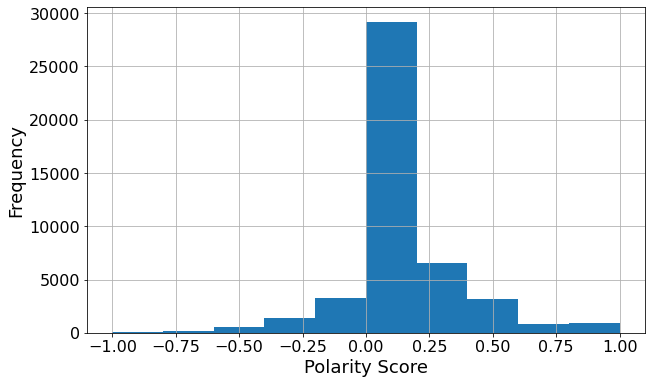

In [26]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./output/polarity_hist.png")

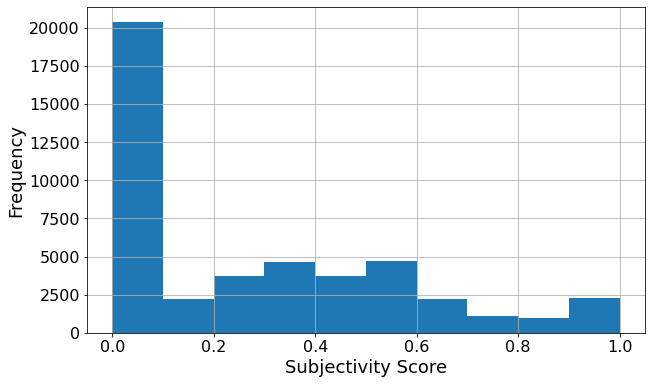

In [27]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("./output/subjectivity_hist.png")

### Inspección

#### Inspeccionamos tweets  mas negativamente cargados

In [30]:
df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,"Dear Twitter,\n\nGot my #Moderna shot #2 on Tuesday.\n12 hrs afterwards be prepared.\n\nThink of the worst hangover you’… https://t.co/7DjuvHHzgt",-1.0,1.0
1,❗⚠️ Horrific reaction to the #Moderna #Covid19.💉😲💥🤯\n\nhttps://t.co/hmpRKhpiVe,-1.0,1.0
2,@bppoddar terrible and horrible arrangements. No one should get jabbed here. #covaxin,-1.0,1.0
3,Worst part about having Bell’s Palsy- saying the words Bell’s Palsy while experiencing Bell’s Palsy. #thanksModerna… https://t.co/03lu1EgZJk,-1.0,1.0
4,Imagine being one of these 200 kids parents.... fucked up!!! #oxfordastrazeneca\n#vaccination\n https://t.co/ndynQnCy0t,-1.0,0.7
5,Pharmaceutical greed at its worst...\n\n#PfizerBioNTech \n\nhttps://t.co/nT98jdzMlj,-1.0,1.0
6,Spread ro anyone who is afraid of taking vaccine!!! #VaccinesWork #CovidVaccine #COVID19 #Covishield #Covaxin https://t.co/88ITsUJ3yB,-1.0,0.9
7,chills all night and now an awful headache #moderna #seconddose,-1.0,1.0
8,Outrageous that #Moderna #vaccine not approved in #Japan weeks ago. This isn’t the fault of #Moderna or the #EU or… https://t.co/UI0RtbMkJW,-1.0,1.0
9,#Moderna is simply evil. If kids don't die from this they will have immune issues that will make them customers of… https://t.co/mBbw2mMxLW,-1.0,1.0


#### Inspeccionamos tweets  mas positivamente cargados

In [32]:
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,BEST TRIMMER IN JUST \n ➌➎⓿\n\nhttps://t.co/yKS5PEqDDe\n\n#Ayesha #COVAXIN #HBDMKStalin… https://t.co/sGsEp8AZRS,1.0,0.300
1,@DalitTalks Dr /Sonia Madam\nClarify use #SocialMedia\nThe best vaccine for Indian #COVID19 #SputnikV\n50 countries ar… https://t.co/D4F9g9950V,1.0,0.300
2,"When we lost the #SputnikV deal, We lost our greatest weapon in fighting Covid19. \n\n@StateHouseKenya @MOH_Kenya… https://t.co/dfF7GSvs0v",1.0,1.000
3,"Just got my 1st #PfizerBioNTech vaccine 💉, feeling great 😊 \nThe power of science and reason! Very happy how my univ… https://t.co/OltmU1JRtV",1.0,0.875
4,@PTI_News Sonia Madam\nClarify use #SocialMedia\nThe best vaccine for Indian #COVID19 #SputnikV\n50 countries are usin… https://t.co/vqMZNotf6z,1.0,0.300
5,Questions in 🇧🇦 on whether the authorities agreed on the best conditions when buying #SputnikV🇷🇺 vaccines continue.… https://t.co/74RsA9KxwM,1.0,0.300
6,"Primera Dosis #PfizerBiontech #Covid_19 #YoMeVacuno 10-03-3021 I'm Very Happy, https://t.co/IgKtbwuvsS",1.0,1.000
7,This is a brilliant ! Kudos #BharatBiotech #Covaxin \n\n@BharatBiotech \n\n#AtmaNirbharBharat https://t.co/SYoLBq1fQS,1.0,1.000
8,So proud of my boys!! #dogood #bethegood #science💉🦠 #Moderna #vaccinate #COVID19 https://t.co/9S7JsY4pqT,1.0,1.000
9,@PTI_News Sonia Madam\nClarify use #SocialMedia\nThe best vaccine for Indian #COVID19 #SputnikV\n50 countries are usin… https://t.co/EaEFaRnUCq,1.0,0.300


#### Inspeccionamos tweets mas subjetivos (scala entre 0 y 1)

In [33]:
df.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,I'm officially fully vaccinated. Yay me!\n#COVIDVaccination #Moderna,0.0,0.0
1,@UN BREAKING NEWS : #SputnikV approved for emergency use in India.,0.0,0.0
2,Centre approves Russia’s Covid-19 vaccine Sputnik V \n\n#SputnikV is the third vaccine approved by India after Covish… https://t.co/XC7mJ3pnZe,0.0,0.0
3,#SputnikV approved...,0.0,0.0
4,What the #Moderna vials look like #COVID19 #GetVaccinated https://t.co/N043p39G86,0.0,0.0
5,"1st dose #moderna #covid19 #vaccine! I got my shot! @ Durham, North Carolina https://t.co/HDRI8hKm4M",0.0,0.0
6,#BigBreaking #SputnikV is the third vaccine approved by India after Covishield and Covaxin.,0.0,0.0
7,@WSJ Here are the comparisons of #Moderna #Pfizer_BioNTech #JohnsonAndJohnson #astrazenecavaccine #Novavax #Sputnik… https://t.co/XbAK6LDhKp,0.0,0.0
8,Here are the comparisons of #Moderna #Pfizer_BioNTech #JohnsonAndJohnson #astrazenecavaccine #Novavax #Sputnik… https://t.co/TzyTr1FgwO,0.0,0.0
9,@JM_Scindia BREAKING NEWS : #SputnikV approved for emergency use in India.,0.0,0.0


#### Inspeccionamos los tweets mas objetivos

In [34]:
df.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,Pick out your favorite link in\nbio 👈☝\n#Dek64 #s0304 #seymasubasi #MilanSampdoria #شوقردادي #مبادل_الحفر #منا_وفينا… https://t.co/oo5F9T9yyN,0.5,1.0
1,IMPORTANT 👉 There are the results of the work of @GamarnikLab and colleagues at the PBA: shows that the #SputnikV v… https://t.co/7RaAFaz2mW,0.4,1.0
2,Happy #valentinesday2021...\n\n#PfizerVaccine\n#PfizerBiontech \n@adarpoonawalla\n@SerumInstIndia https://t.co/StJmLWEqNr,0.8,1.0
3,@Saka_m97 @martka1725 @vonderleyen @EU_Commission @FT The only place #EU can get #covid #vaccines immediately is US… https://t.co/7EVu3k4aUy,0.0,1.0
4,"FINALLY. \n#moderna #2\n#getvaxxed\n#wearamask\n#dothethings @ Des Moines, Iowa https://t.co/DY2WeBcUof",0.0,1.0
5,Brilliant 👏🇬🇧 #COVID19Vaccine #AstraZeneca #OxfordAstraZeneca #oxforduniversity https://t.co/nRU5TlmPSg,0.9,1.0
6,💉 The EU hasn't engaged in negotiations with Russia on a potential purchase of #SputnikV vaccine against the corona… https://t.co/01cUq7LmAt,0.0,1.0
7,Possible Link Between #AstraZeneca COVID-19 Vaccine and Blood Clots: Under 30s to be given Pfizer’s or #Moderna m… https://t.co/oTHH2xyjUP,0.0,1.0
8,#Hialeah secures partnership to distribute #Moderna #CovidVaccine as #FEMA sites move to only offer… https://t.co/dx5guhIwe5,0.0,1.0
9,Happy #WorldHealthDay!! #Moderna https://t.co/xw4ScEqEdq,1.0,1.0


#### Inspeccionamos cuantos tweets hay con respecto al tiempo

In [39]:
timeline = df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['text']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()
#fig.write_image("./output/tweet_freq_over_time.png")

### Analisis de sentimientos (Time-Series)

polarity values ranging from -1 to 1 are really useful for sentiment analysis
but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it

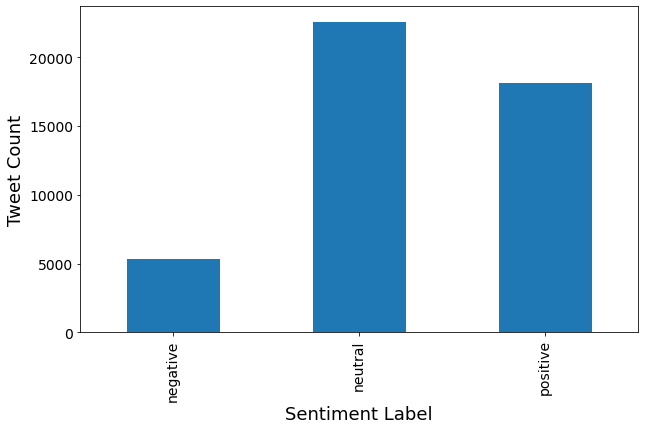

<Figure size 432x288 with 0 Axes>

In [41]:
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()
fig.savefig("./output/sentiment_value_counts", bbox_inches='tight');

In [42]:
timeline = df.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = df.groupby(['date']).count().reset_index()['retweets']
timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

,date,count,polarity,retweets,favorites,subjectivity
0,2020-12-12,38,0.034952,0.631579,2.868421,0.227801
1,2020-12-13,52,0.055937,1.942308,7.500000,0.255696
2,2020-12-14,83,0.116874,4.698795,29.204819,0.267803
3,2020-12-15,87,0.094041,1.022989,7.333333,0.258078
4,2020-12-16,78,0.104020,1.000000,5.115385,0.248872
...,...,...,...,...,...,...
136,2021-05-17,676,0.088669,3.758876,22.665680,0.242953
137,2021-05-18,639,0.074013,2.025039,10.943662,0.241400
138,2021-05-19,654,0.090741,7.018349,37.460245,0.252863
139,2021-05-20,691,0.090425,2.565847,16.144718,0.237433


In [43]:
timeline.sort_values(by='polarity', ascending=False)

,date,count,polarity,retweets,favorites,subjectivity
12,2020-12-24,70,0.184387,3.657143,17.842857,0.310656
31,2021-01-12,52,0.182608,0.961538,6.961538,0.271700
19,2020-12-31,38,0.169196,1.184211,7.342105,0.282442
16,2020-12-28,26,0.165737,1.461538,4.769231,0.292030
33,2021-01-14,64,0.163502,0.843750,6.531250,0.268629
...,...,...,...,...,...,...
1,2020-12-13,52,0.055937,1.942308,7.500000,0.255696
124,2021-04-15,880,0.052703,3.839773,13.904545,0.258732
35,2021-01-16,82,0.039450,9.670732,17.024390,0.262114
0,2020-12-12,38,0.034952,0.631579,2.868421,0.227801


In [45]:
df[df['date'].astype(str) == '2021-01-12'][['user_location', 'date', 'text', 'hashtags', 'polarity', 'subjectivity', 'sentiment']]

,user_location,date,text,hashtags,polarity,subjectivity,sentiment
2416,Northern Ireland,2021-01-12,Delighted to receive my second vaccine today 👏🏻 #PfizerBioNTech #COVID19Vaccine https://t.co/QQOAwTG8tn,"['PfizerBioNTech', 'COVID19Vaccine']",0.350000,0.350000,positive
2531,"Nottingham, England",2021-01-12,Had my COVID-19 vaccine on Friday 💉 and experienced most of the side effects #COVIDVaccination #PfizerBioNTech \n- h… https://t.co/8zGRzftQWM,"['COVIDVaccination', 'PfizerBioNTech']",0.650000,0.700000,positive
2952,Ragbag Of Reviews And Insights,2021-01-12,#EU Plans To Purchase 300-million More #Covid19 Vaccines https://t.co/E6CxrV4yHA #covidvaccines #Pfizer… https://t.co/AKQ3vS8Dgi,"['EU', 'Covid19', 'covidvaccines', 'Pfizer']",0.500000,0.500000,positive
3121,"Corleone, Sicilia",2021-01-12,Just had my first #COVIDVaccination #COVID19 I am now 70% immortal #PfizerVaccine #PfizerBioNTech #Pfizer,"['COVIDVaccination', 'COVID19', 'PfizerVaccine', 'PfizerBioNTech', 'Pfizer']",0.250000,0.333333,positive
3124,"London, UK",2021-01-12,Getting vaccinated today. ☺️ #PfizerBioNTech,['PfizerBioNTech'],0.000000,0.000000,neutral
3128,"Vienna, Dublin, & Cyberspace",2021-01-12,@AvilaLipsett @jessica_anhold Woefully behind other countries. #Israel way ahead; smartly ordered #PfizerBioNTech i… https://t.co/OMTNQcGygC,"['Israel', 'PfizerBioNTech']",-0.103571,0.572619,negative
3131,UK,2021-01-12,#Covid-19 vaccines are from \n\n#PfizerBioNTech --- ? -70C £15\nUniversity of #Oxford and #AstraZeneca -- fridg… https://t.co/6sUEmVUToI,"['Covid', 'PfizerBioNTech', 'Oxford', 'AstraZeneca']",0.000000,0.000000,neutral
3132,"South West, England",2021-01-12,"Had my first dose of #PfizerBioNTech vaccine today at @RUHBath, truly impressed to see the arrangements. High prais… https://t.co/V9EwDUGZwW",['PfizerBioNTech'],0.470000,0.624444,positive
3133,"Southampton, England",2021-01-12,There isn't enough words to say how grateful I am to have received the first #COVID19Vaccine #PfizerBioNTech today… https://t.co/Y9iUS8J5Xc,"['COVID19Vaccine', 'PfizerBioNTech']",0.125000,0.416667,positive
3134,Belgium,2021-01-12,Discover today's front pages of the #BelgianPress 🗞📅🧐!\n#MbayeLeye #Standard #variantecovid #Variant #DogStudio… https://t.co/LttvTIDAnp,"['BelgianPress', 'MbayeLeye', 'Standard', 'variantecovid', 'Variant', 'DogStudio']",0.000000,0.000000,neutral


#### Tweets over time, color-coded by average polarity score

In [47]:
fig = px.bar(timeline, x='date', y='count', color='polarity')
fig.show()

#### Plot tweets over time, color-coded by average subjectivity score

In [48]:
fig = px.bar(timeline, x='date', y='count', color='subjectivity')
fig.show()

## Filtro por Vaccy

In [49]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['retweets']
    timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline

In [50]:
pfizy_df, pfizy_timeline = filter_by_vaccy(df, ['pfizer', 'biontech'])
print(pfizy_df.shape)
fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
fig.show()

(6918, 18)


In [51]:
moderna_df, moderna_timeline = filter_by_vaccy(df, ['moderna'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()

(11103, 18)


In [52]:
astra_df, astra_timeline = filter_by_vaccy(df, ['astrazeneca'])
astra_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity,sentiment
0,Phil.one,"Florida, USA",Retired Physics Teacher. Sharing is caring. Heavily invested in Crypto since 2012. More money than I'll ever spend. Donate regularly. Husband. Father. Free,2009-12-21 06:09:33,97,192,220,False,2021-04-12,Don't be selfish!\n\n#COVID19 #coronavirus #vaccine #VaccinePassports #spirituality #awaken #viral #AstraZeneca… https://t.co/99TGRw7n8S,"['COVID19', 'coronavirus', 'vaccine', 'VaccinePassports', 'spirituality', 'awaken', 'viral', 'AstraZeneca']",Twitter Web App,0,0,False,-0.625000,1.000000,negative
1,Sarah #CO2ISLIFE #COVIDisaSeasonalRespiratoryVirus,"SW England, UK",Don’t let MSM and organised provocations divide us. We need to work together.,2011-07-03 09:50:25,2441,3659,61534,False,2021-03-26,@SandraWeeden @therealbiostate People are suggesting that the #AstraZenecavaccine isn’t as dangerous as the… https://t.co/LH1bkf2pM8,['AstraZenecavaccine'],Twitter for iPhone,3,3,False,-0.600000,0.900000,negative
2,Hazel 💙 #BackTo60 💐😉,Herts/roots in Essex,The most important things in my life are my family and being happy! Travelholic✈️ (My own views) 🤔🤭😉 #50sWomen #BackTo60,2014-09-18 13:02:33,850,392,13310,False,2021-03-18,Sorry if this appears to be a silly question 🙋‍♀️ \n\nWhy is the #AstraZeneca vaccine being produced in India 🇮🇳 &amp; NO… https://t.co/3hlHj7h6hU,['AstraZeneca'],Twitter for iPad,0,1,False,-0.500000,0.937500,negative
3,Dr.med. Bernd Kynast,"Milky way, I can see aliens !","Medical Oncology, Molecular Genetics, ArmsTech & 'Businessman',Commander (Navy, Reserve) #Instagram DrKynast #USA done #Passion4Prussia",2016-09-07 02:03:23,3257,3908,21395,False,2021-03-23,@EricTopol @AstraZeneca @NIH Making of #scandal sitting in @WhiteHouse #Glasshouse of corrupt @POTUS &amp; controversia… https://t.co/dsD1FATJNu,"['scandal', 'Glasshouse']",Twitter for Android,0,0,False,-0.500000,1.000000,negative
4,El Muy Lorenzo,elmuylorenzo29@gmail.com,Humorous and satirical perspective on academia and life in general. Sole producer and distributor of ZNA.,2011-04-14 13:19:35,36,269,9,False,2021-03-19,#Russia is spreading fake news about the safety of the @AstraZeneca vaccine so as to discourage its use &amp; increase… https://t.co/lB09XGXWNw,['Russia'],Twitter Web App,0,0,False,-0.500000,1.000000,negative
5,El Muy Lorenzo,elmuylorenzo29@gmail.com,Humorous and satirical perspective on academia and life in general. Sole producer and distributor of ZNA.,2011-04-14 13:19:35,36,269,9,False,2021-03-25,#Putin is trying to discredit the @AstraZeneca vaccine by spreading fake news about its safety in order to boost th… https://t.co/SdeAEzGq5r,['Putin'],Twitter Web App,0,0,False,-0.500000,1.000000,negative
6,Nyambariga Nyabwari,"Kisii, Kenya",Taxpayer,2015-03-10 19:21:08,14586,861,114716,False,2021-03-30,@WilliamsRuto The poor Kenyans you call hustlers will receive #astrazenecavaccine while their Lord Hustler and his… https://t.co/coNp138QY2,['astrazenecavaccine'],Twitter for Android,0,4,False,-0.400000,0.600000,negative
7,"Provo🐱EUr. I think, therefore I am. 🇪🇺native.",1996 BrExodus 2020,'Common sense is not so common.' \n\n'Those who can make you believe absurdities can make you commit atrocities.' \n\n'We must cultivate OUR 🇪🇺 garden.'\n\nVoltaire,2011-12-13 05:05:30,883,871,31600,False,2021-04-13,"@DaveKeating Bad news for the EU: Europeans rejecting #astrazeneca, same issues with #JohnsonandJohnson,\nthe US ar… https://t.co/pJd3jBdpBh","['astrazeneca', 'JohnsonandJohnson']",Twitter Web App,0,0,False,-0.350000,0.395833,negative
8,Ricarda Milstein,Hamburg - Berlin,Health Economist @unihh/@hche_uhh. Passion for Asia and baroque music. All views are my own. RT ≠ endorsement.,2014-09-24 20:22:30,388,387,3863,False,2021-02-17,The @tagesspiegel reports that only 2% of 🇩🇪 would choose #AstraZeneca. Thank god it's not that bad: A

In [53]:
covaxin_df, covaxin_timeline = filter_by_vaccy(df, ['covaxin'])
covaxin_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity,sentiment
0,Akriti Dokania,"London, England",VC at 🐙 but at heart a full time product manager (ex-MSFT). 'Inclusion' is what needs to happen next. Tweets here are mine.,2010-05-23 04:13:59,509,813,974,False,2021-05-18,@bppoddar terrible and horrible arrangements. No one should get jabbed here. #covaxin,['covaxin'],Twitter for iPhone,0,0,False,-1.000000,1.000000,negative
1,Bhakt 🇮🇳🌷🇮🇳,वसुधैव कुटुंबकम्,#MainBhiChowkidar🌷'अहिंसा परमोधर्म: धर्म हिंसा तदैवच'\nRetweets are not my views.Follod by @GKapoor.\nBJP membership 1073738617,2014-01-25 09:19:52,390,389,50014,False,2021-04-14,A shocking incident:\nRajasthan where 320 doses of #Covaxin vaccine were stolen from the @INCIndia office in… https://t.co/fDPB1kezPi,['Covaxin'],Twitter for Android,0,1,False,-1.000000,1.000000,negative
2,अजित..,"Nashik, India",भारतीय 🇮🇳,2010-07-31 18:14:44,248,630,6469,False,2021-05-16,That's horrible..\n#CovishieldVaccine \n#covaxin \n#BlackMarketing https://t.co/hRFawKzuBb,"['CovishieldVaccine', 'covaxin', 'BlackMarketing']",Twitter for Android,0,0,False,-1.000000,1.000000,negative
3,Rupinder Sayal,India,"Biologist by training, and loves to teach! Founder of Spartan Tutorials.",2010-10-31 18:19:15,220,1043,4557,False,2021-03-30,This is some seriously horrible piece of news.\n#COVID19Vaccine #Covaxin #bharatbiotech \nhttps://t.co/93zBSjgAKr,"['COVID19Vaccine', 'Covaxin', 'bharatbiotech']",Twitter Web App,0,0,False,-1.000000,1.000000,negative
4,Nikhil K.,"Mumbai, India","Political Commentator. Media Professional. Scotch Lover. Ghazal Enthusiast. (Moving to this new account from the old one)\n जय हिंद, जय महाराष्ट्र 🇮🇳",2021-03-31 14:12:21,27,345,71,False,2021-04-07,@PritishNandy Vicious people like you are treating the #Indian vaccines like #Covishield and #Covaxin with derision… https://t.co/j18FUfeDfv,"['Indian', 'Covishield', 'Covaxin']",Twitter for Android,0,1,False,-1.000000,1.000000,negative
5,shreekant kumar,"Ahmadabad City, India","Development sector professional, RTs are no endorsement and my views are my personal and not represent any organisation.",2010-09-02 14:23:21,204,546,71688,False,2021-04-21,I hope people doubting #covaxin will take note of it. What a pathetic scene it was when head of Bharat Biotech was… https://t.co/rD1v6xXTWO,['covaxin'],Twitter for Android,0,1,False,-1.000000,1.000000,negative
6,theHammy,"California, USA",A human.,2016-09-25 10:59:03,62,154,12414,False,2021-04-21,🚨🚨🚨#OCGN with an insane After Hours Run!!! Look at that.\nCovaxin News\n#Bullish $OCGN #WeBull #MOASS #Covaxin… https://t.co/njmG0HojP1,"['OCGN', 'Bullish', 'WeBull', 'MOASS', 'Covaxin']",Twitter for iPhone,0,0,False,-1.000000,1.000000,negative
7,Prasenjit Bhakat,"Jhargram,W Bengal,India","Past President (2011-12): Rotary Jhargram Green, Rotary Int'l Dist 3291;\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\nConsumer Activist,Secretary: Consumer Guidance Center.",2009-08-31 02:14:30,390,1658,5071,False,2021-03-03,@gurpreetscheema @Milan_reports @BharatBiotech @IndiaToday Shocking #clinicaltrials of COVAXIN #COVID19Vaccine. Sig… https://t.co/1Baj3QqeRk,"['clinicaltrials', 'COVID19Vaccine']",Twitter Web App,0,0,False,-1.000000,1.000000,negative
8,Gurjot,"Punjab, India",BEING MALE IS MATTER OF BIRTH\nBEING GENTLEMEN IS MATTER OF CHOICE,2019-04-18 04:06:02,14,37,973,False,2021-04-21,Worst decision ever by govt to charge for vaccine. #Covishield #Covaxin https://t.co/pJqOn0oLvH,"['Covishield', 'Covaxin']",Twitter for Android,0,1,False,-1.000000,1.000000,negative
9,Prasenjit Bhakat,"Jhargram,W Bengal,India","Past President (2011-12): Rotary Jhargram Green, Rotary Int'l Dist 3291;\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\nConsumer Activist,Secretary: Consumer Guidance Center.",2009-08-31 02:14:30,390,1658,5071,False,2021-03-03,@ShamikaRavi @BharatBiotech Shocking #clinicaltrials of COVAXIN #COVID19Vac

## Nubes de palabras

In [55]:
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /home/daro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/daro/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Simple

(-0.5, 999.5, 499.5, -0.5)

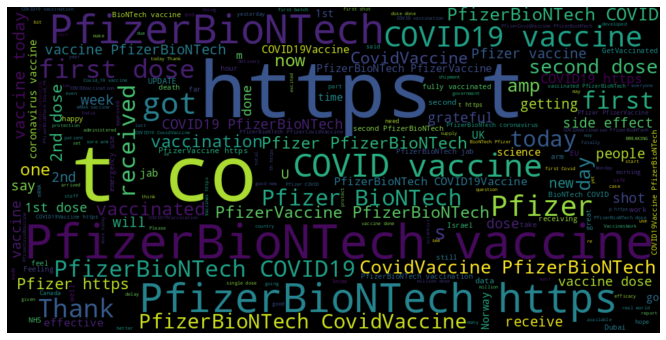

In [56]:
tweet_df = pfizy_df
words = ' '.join([word for word in tweet_df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

### Avanzado

In [58]:
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#     plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words
    
def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

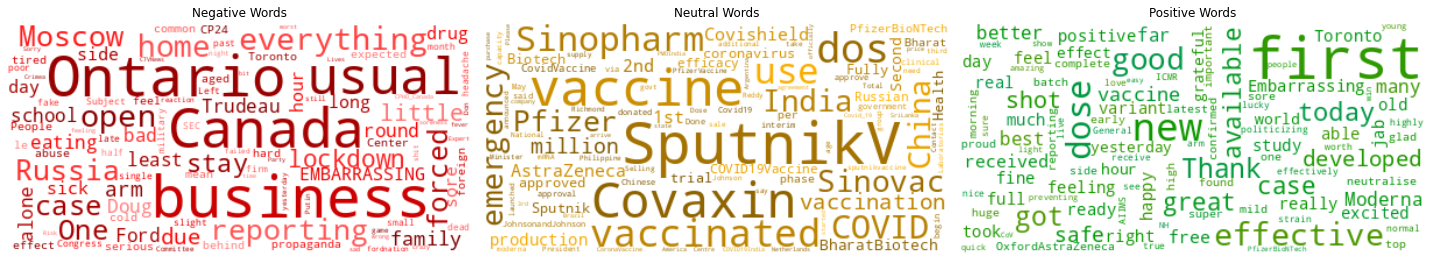

In [59]:
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig

# Convert string to a list of words
wordcloud_df = df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("./output/sentiment_wordclouds.png", bbox_inches="tight")

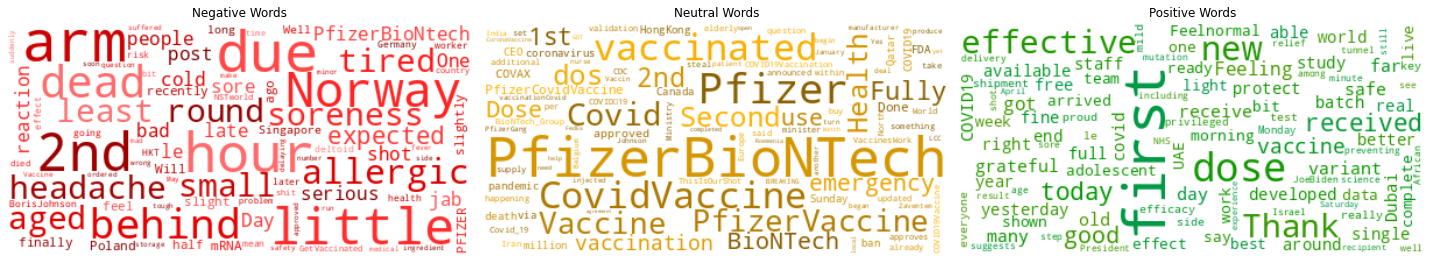

In [60]:
wordcloud_df = pfizy_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("./output/pfizy_sentiment_wordclouds.png", bbox_inches="tight")

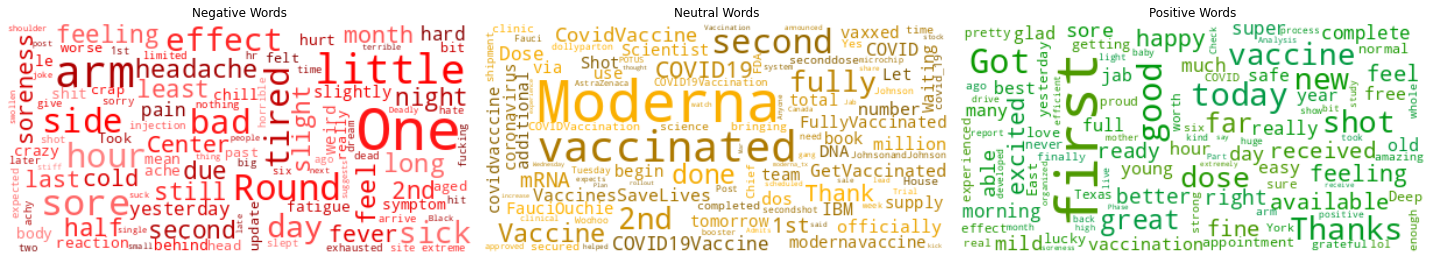

In [61]:
wordcloud_df = moderna_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("./output/moderna_sentiment_wordclouds.png", bbox_inches="tight")

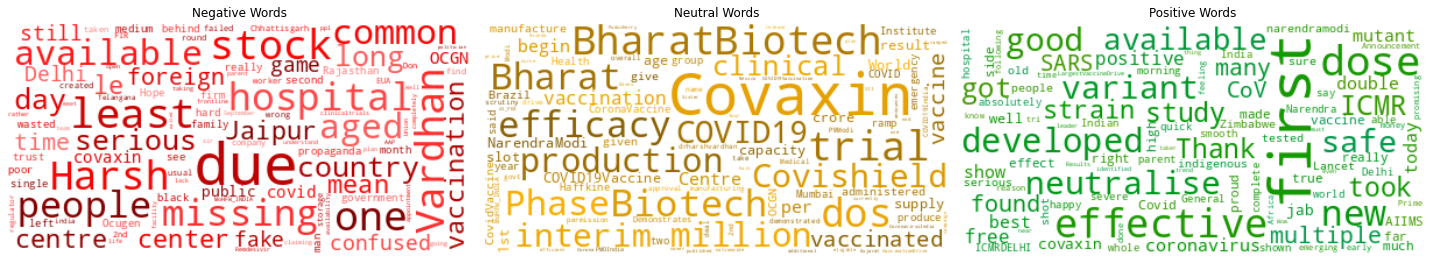

In [62]:
wordcloud_df = covaxin_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("./output/covaxin_sentiment_wordclouds.png", bbox_inches="tight")

## Ideas de extencion
* Use the tweepy API to get tweets about the Johnson & Johnson Vaccine, and apply sentiment analysis onto them.
* Which hashtags are people using? Is the use of hashtags correlated with higher like counts and/or retweet counts?
* Analyze the faction of the tweets that include URLs. Do tweets with URLs have primarily neutral sentiments?
* What are verified Twitter users saying about the COVID-19 vaccine?
* What are people saying with respect to side effects? Which vaccine has the worst side effects?
* Correlate the COVID-19 World Vaccination Progress dataset with this sentiment analysis to monitor how attitudes are changing towards the vaccine as the rollout continues.